#  Credit Card Fraud Detection

![](banner_credit_card.jpg)

Naive Bayes | SVM | Neural Network | Logistic Regression | k-Nearest Neighbor | Decision Tree

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
update_geom_defaults("point", list(size=0.5, colour="green4"))                               

.................................................... start of document ....................................................

## Situation

* **Role:**  Vice President of Fraud Prevention
* **Decision:**  Intervene in which credit card transactions? 
* **Approach:**  Build predictive models to detect fraudulent transactions, using 6 different predictive analytic methods.  Choose the best model as the criterion for intervention. 
* **Dataset:**  The dataset comprises transactions made by credit cards in September 2013 by European cardholders that occurred over two days, in which there were 492 frauds out of 284,807 transactions. The dataset is highly unbalanced - the positive class (frauds) account for 0.172% of all transactions.  It contains numerical variables V1, V2, ... V28, which are the result of a PCA transformation. Due to confidentiality issues, the original variables and more background information about the data are not provided.  'Time' is the number of seconds elapsed between a transaction and the first transaction in the dataset.  'Amount' is the transaction amount. 'Class' takes value 1 in case of fraud and 0 otherwise.  The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML  Citation: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

## Decision Model

### Influence Diagram

<img src="business-model_credit_card.jpg" align=left width=850 />

## Data

In [2]:
data = read.csv("Credit Card Transactions.csv") # may take about 40 seconds
size(data)
head(data)

observations,variables
284807,31


Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,-0.5515995,-0.61780086,-0.9913898,-0.3111694,1.4681770,-0.4704005,0.20797124,0.02579058,0.40399296,0.25141210,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,1.6127267,1.06523531,0.4890950,-0.1437723,0.6355581,0.4639170,-0.11480466,-0.18336127,-0.14578304,-0.06908314,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,0.6245015,0.06608369,0.7172927,-0.1659459,2.3458649,-2.8900832,1.10996938,-0.12135931,-2.26185710,0.52497973,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,-0.2264873,0.17822823,0.5077569,-0.2879237,-0.6314181,-1.0596472,-0.68409279,1.96577500,-1.23262197,-0.20803778,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,0.75307443,-0.8228429,0.53819555,1.3458516,-1.1196698,0.1751211,-0.4514492,-0.23703324,-0.03819479,0.80348692,0.40854236,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,-0.37140720,1.3412620,0.35989384,-0.3580907,-0.1371337,0.5176168,0.4017259,-0.05813282,0.06865315,-0.03319379,0.08496767,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


## Data Representation

In [3]:
data$class = factor(data$Class, levels=c(1,0), labels=c("fraud","legit"))
data$class.bin = data$Class
data$Class = NULL
head(data)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class,class.bin
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,-0.5515995,-0.61780086,-0.9913898,-0.3111694,1.4681770,-0.4704005,0.20797124,0.02579058,0.40399296,0.25141210,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,legit,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,1.6127267,1.06523531,0.4890950,-0.1437723,0.6355581,0.4639170,-0.11480466,-0.18336127,-0.14578304,-0.06908314,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,legit,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,0.6245015,0.06608369,0.7172927,-0.1659459,2.3458649,-2.8900832,1.10996938,-0.12135931,-2.26185710,0.52497973,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,legit,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,-0.2264873,0.17822823,0.5077569,-0.2879237,-0.6314181,-1.0596472,-0.68409279,1.96577500,-1.23262197,-0.20803778,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,legit,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,0.75307443,-0.8228429,0.53819555,1.3458516,-1.1196698,0.1751211,-0.4514492,-0.23703324,-0.03819479,0.80348692,0.40854236,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,legit,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,-0.37140720,1.3412620,0.35989384,-0.3580907,-0.1371337,0.5176168,0.4017259,-0.05813282,0.06865315,-0.03319379,0.08496767,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,legit,0


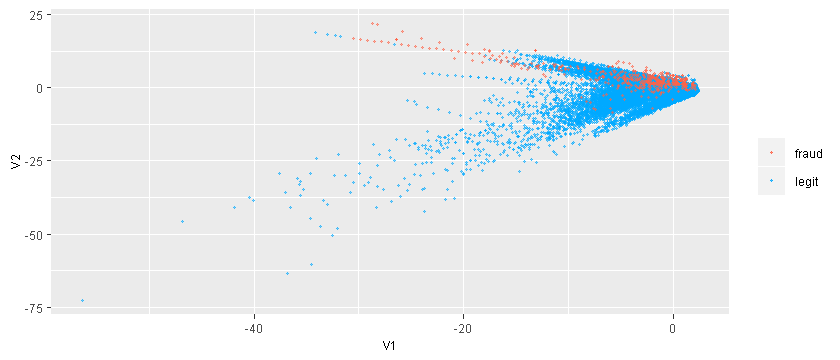

In [4]:
ggplot() +
geom_point(aes(x=V1, y=V2, color="legit"), data=data[data$class=="legit",], alpha=0.5) +
geom_point(aes(x=V1, y=V2, color="fraud"), data=data[data$class=="fraud",], alpha=0.5) +
scale_color_manual(values=c(legit=PALETTE[1], fraud=PALETTE[2]))

## Data Partition

### Partition data 50% for training and 50% for testing, balance training by downsampling

In [5]:
set.seed(0)
train = createDataPartition(data$class, p=0.50)[[1]]
data.train = data[train,]
data.test  = data[setdiff(1:nrow(data), train),]

FT = table(data.train$class)
ft = FT/sum(FT)
prior = as.data.frame(t(as.matrix(ft)))

data.train = rbind(data.train[data.train$class=="fraud",],
                   data.train[sample(which(data.train$class=="legit"), length(which(data.train$class=="fraud")), replace=FALSE),])

layout(fmt(prior),
       fmt(as.data.frame(table(data.train$class)), "train"),
       fmt(as.data.frame(table(data.test$class)),  "test"))

fraud,legit
0.0017275,0.9982725
Var1,Freq
fraud,246
legit,246
Var1,Freq
fraud,246
legit,142157


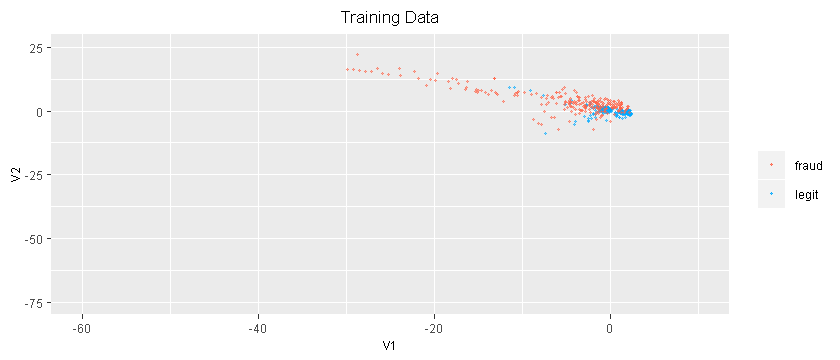

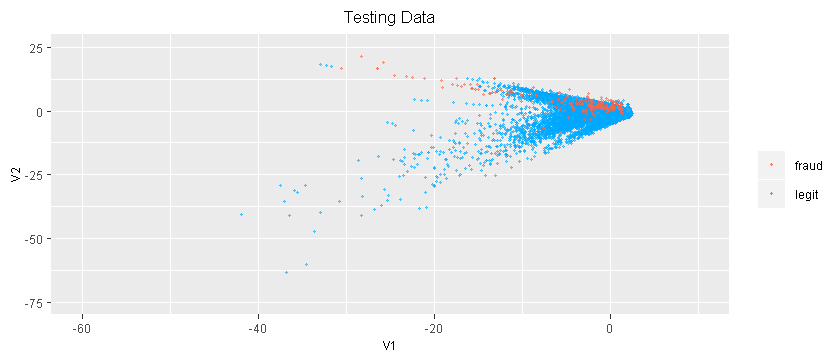

In [6]:
ggplot() + ggtitle("Training Data") + xlim(-60,10) + ylim(-75,25) +
geom_point(aes(x=V1, y=V2, color="legit"), data=data.train[data.train$class=="legit",], alpha=0.5) +
geom_point(aes(x=V1, y=V2, color="fraud"), data=data.train[data.train$class=="fraud",], alpha=0.5) +
scale_color_manual(values=c(legit=PALETTE[1], fraud=PALETTE[2]))

ggplot() + ggtitle("Testing Data") + xlim(-60,10) + ylim(-75,25) +
geom_point(aes(x=V1, y=V2, color="legit"), data=data.test[data.test$class=="legit",], alpha=0.5) +
geom_point(aes(x=V1, y=V2, color="fraud"), data=data.test[data.test$class=="fraud",], alpha=0.5) +
scale_color_manual(values=c(legit=PALETTE[1], fraud=PALETTE[2]))

## Business Parameters

In [7]:
intervention = 10
dissatisfaction_penalty = 1000
charge = mean(data[data$class=="fraud", "Amount"])

# For Sensitivity Analysis ...
# intervention = 10
# dissatisfaction_penalty = 100
# charge = 1000


data.frame(intervention, dissatisfaction_penalty, charge)

intervention,dissatisfaction_penalty,charge
10,1000,122.2113


## Baseline

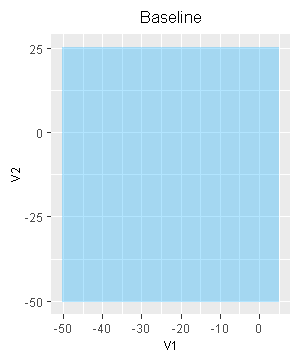

In [8]:
grid = data.frame(expand.grid(seq(-50,5,0.5), seq(-50,25,0.5))); names(grid) = c("V1","V2")
class.predicted = rep(factor("legit", levels=c("fraud","legit")), nrow(grid))

output_size(2.5,3)
ggplot(grid) + ggtitle("Baseline") +
geom_tile(aes(x=V1, y=V2, fill=class.predicted), alpha=0.3) +
scale_fill_manual(values=PALETTE[c(2,1)], drop=FALSE) + theme.no_legend
output_size(restore)

In [9]:
class.predicted = rep(factor("legit", levels=c("fraud","legit")), nrow(data.test))
CM = confusionMatrix(class.predicted, data.test$class)$table
cm = CM/sum(CM)
accuracy.base = cm[1,1]+cm[2,2]
fpr.base = cm[1,2]/sum(cm[,2]) # predicted fraud, but actually legit
fnr.base = cm[2,1]/sum(cm[,1]) # predicted legit, but actually fraud

layout(fmt.cm(cm), fmt(data.frame(accuracy=accuracy.base, fpr=fpr.base, fnr=fnr.base), title=""))

,fraud,legit
fraud,0.0000000,0.0000000
legit,0.0017275,0.9982725
accuracy,fpr,fnr
0.9982725,0,1


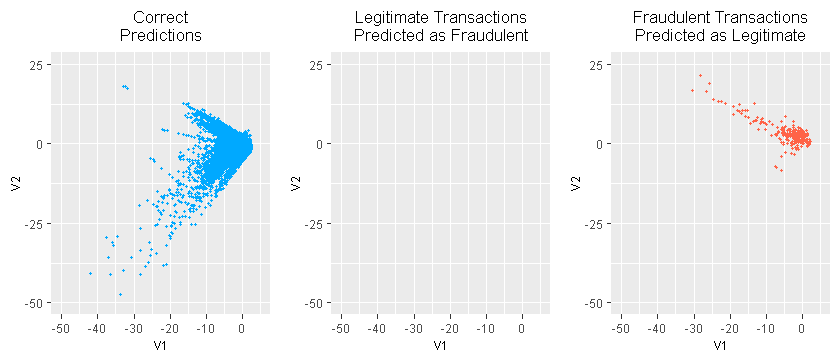

In [10]:
p1 = ggplot(data.test[data.test$class==class.predicted,]) +
     ggtitle("Correct\nPredictions") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[c(2,1)], drop=FALSE) + theme.no_legend

p2 = ggplot(data.test[data.test$class=="legit" & class.predicted=="fraud",]) +
     ggtitle("Legitimate Transactions\nPredicted as Fraudulent") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[1]) + theme.no_legend

p3 = ggplot(data.test[data.test$class=="fraud" & class.predicted=="legit",]) +
     ggtitle("Fraudulent Transactions\nPredicted as Legitimate") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[2]) + theme.no_legend

grid.arrange(p1, p2, p3, nrow=1)

In [11]:
cost.legit_fraud = cm[2,1]/sum(cm[,1]) * length(which(data$class=="fraud")) * charge
cost.fraud_legit = cm[1,2]/sum(cm[,2]) * length(which(data$class=="legit")) * (dissatisfaction_penalty + intervention)
cost.fraud_fraud = cm[1,1]/sum(cm[,1]) * length(which(data$class=="fraud")) * intervention
cost.legit_legit = 0
cost.base = cost.legit_fraud + cost.fraud_legit + cost.fraud_fraud + cost.legit_legit

data.frame(cost.legit_fraud, cost.fraud_legit, cost.fraud_fraud, cost.legit_legit, cost=cost.base)

cost.legit_fraud,cost.fraud_legit,cost.fraud_fraud,cost.legit_legit,cost
60127.97,0,0,0,60127.97


## Predict Fraud by Naive Bayes

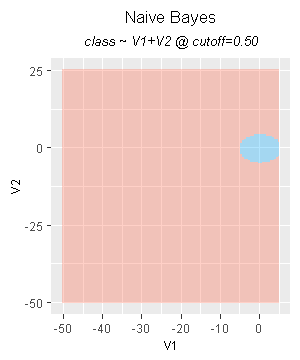

In [12]:
# unbalance training data for naive bayes so that it can account for class prior probabilities
data.train.nb = rbind(data.train[sample(which(data.train$class=="legit"), prior$legit/prior$fraud, replace=TRUE),],
                      data.train[data.train$class=="fraud",])

model = naiveBayes(class ~ V1+V2, data.train.nb)
cutoff = 0.5

grid = data.frame(expand.grid(seq(-50,5,0.5), seq(-50,25,0.5))); names(grid) = c("V1","V2")
class.predicted = as.class(predict(model, grid, type="raw"), class="fraud", cutoff)

output_size(2.5,3)
ggplot(grid) + ggtitle("Naive Bayes", sprintf("class ~ V1+V2 @ cutoff=%0.2f", cutoff)) +
geom_tile(aes(x=V1, y=V2, fill=class.predicted), alpha=0.3) +
scale_fill_manual(values=PALETTE[c(2,1)]) + theme.no_legend
output_size(restore)

In [13]:
prob = predict(model, data.test, type="raw")
class.predicted = as.class(prob, class="fraud", cutoff)
CM = confusionMatrix(class.predicted, data.test$class)$table
cm = CM/sum(CM)
accuracy.nb = cm[1,1]+cm[2,2]
fpr.nb = cm[1,2]/sum(cm[,2]) # predicted fraud, but actually legit
fnr.nb = cm[2,1]/sum(cm[,1]) # predicted legit, but actually fraud

layout(fmt.cm(cm), fmt(data.frame(accuracy=accuracy.nb, fpr=fpr.nb, fnr=fnr.nb), title=""))

,fraud,legit
fraud,0.0007233,0.0345569
legit,0.0010042,0.9637157
accuracy,fpr,fnr
0.964439,0.0346167,0.5813008


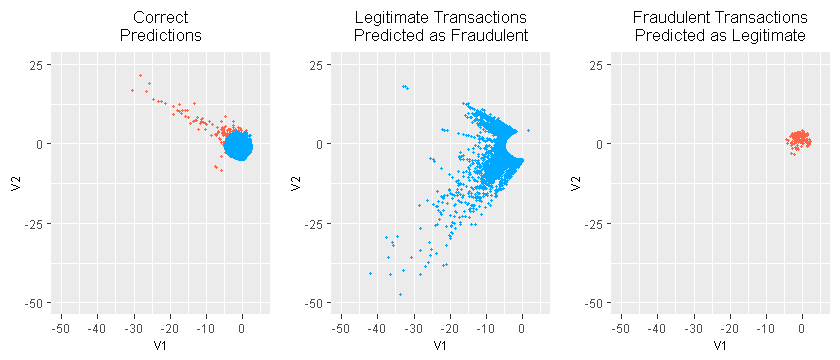

In [14]:
p1 = ggplot(data.test[data.test$class==class.predicted,]) +
     ggtitle("Correct\nPredictions") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[c(2,1)]) + theme.no_legend

p2 = ggplot(data.test[data.test$class=="legit" & class.predicted=="fraud",]) +
     ggtitle("Legitimate Transactions\nPredicted as Fraudulent") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[1]) + theme.no_legend

p3 = ggplot(data.test[data.test$class=="fraud" & class.predicted=="legit",]) +
     ggtitle("Fraudulent Transactions\nPredicted as Legitimate") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[2]) + theme.no_legend

grid.arrange(p1, p2, p3, nrow=1)

In [15]:
cost.legit_fraud = cm[2,1]/sum(cm[,1]) * length(which(data$class=="fraud")) * charge
cost.fraud_legit = cm[1,2]/sum(cm[,2]) * length(which(data$class=="legit")) * (dissatisfaction_penalty + intervention)
cost.fraud_fraud = cm[1,1]/sum(cm[,1]) * length(which(data$class=="fraud")) * intervention
cost.legit_legit = 0
cost.nb = cost.legit_fraud + cost.fraud_legit + cost.fraud_fraud + cost.legit_legit

data.frame(cost.legit_fraud, cost.fraud_legit, cost.fraud_fraud, cost.legit_legit, cost=cost.nb)

cost.legit_fraud,cost.fraud_legit,cost.fraud_fraud,cost.legit_legit,cost
34952.44,9940455,2060,0,9977467


## Predict Fraud by Support Vector Machine

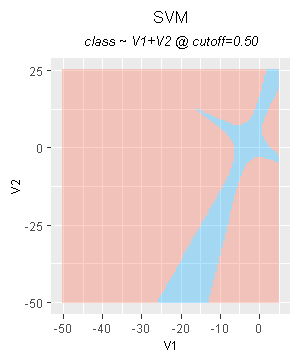

In [16]:
set.seed(0)
model = svm(class ~ V1+V2, data.train, scale=TRUE, kernel="polynomial", degree=4, cost=10, probability=TRUE)
cutoff = 0.5

grid = data.frame(expand.grid(seq(-50,5,0.5), seq(-50,25,0.5))); names(grid) = c("V1","V2")
class.predicted = as.class(attr(predict(model, grid, probability=TRUE), "probabilities"), class="fraud", cutoff)

output_size(2.5,3)
ggplot(grid) + ggtitle("SVM", sprintf("class ~ V1+V2 @ cutoff=%0.2f", cutoff)) +
geom_tile(aes(x=V1, y=V2, fill=class.predicted), alpha=0.3) +
scale_fill_manual(values=PALETTE[c(2,1)]) + theme.no_legend
output_size(restore)

In [17]:
prob = attr(predict(model, data.test, probability=TRUE), "probabilities")
class.predicted = as.class(prob, class="fraud", cutoff)
CM = confusionMatrix(class.predicted, data.test$class)$table
cm = CM/sum(CM)
accuracy.svm = cm[1,1]+cm[2,2]
fpr.svm = cm[1,2]/sum(cm[,2]) # predicted fraud, but actually legit
fnr.svm = cm[2,1]/sum(cm[,1]) # predicted legit, but actually fraud

layout(fmt.cm(cm), fmt(data.frame(accuracy=accuracy.svm, fpr=fpr.svm, fnr=fnr.svm), title=""))

,fraud,legit
fraud,0.0003371,0.0138410
legit,0.0013904,0.9844315
accuracy,fpr,fnr
0.9847686,0.013865,0.804878


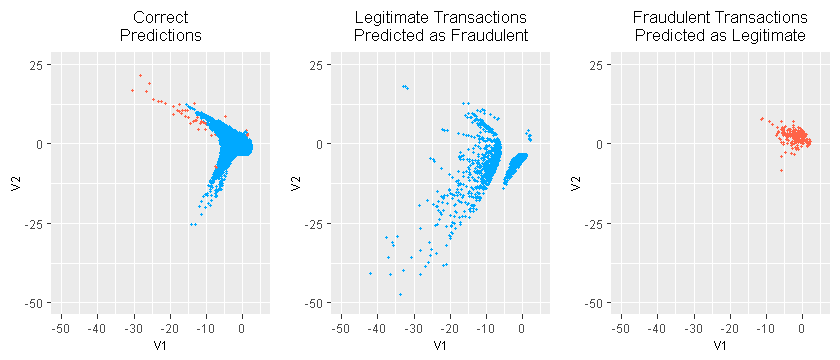

In [18]:
p1 = ggplot(data.test[data.test$class==class.predicted,]) +
     ggtitle("Correct\nPredictions") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[c(2,1)]) + theme.no_legend

p2 = ggplot(data.test[data.test$class=="legit" & class.predicted=="fraud",]) +
     ggtitle("Legitimate Transactions\nPredicted as Fraudulent") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[1]) + theme.no_legend

p3 = ggplot(data.test[data.test$class=="fraud" & class.predicted=="legit",]) +
     ggtitle("Fraudulent Transactions\nPredicted as Legitimate") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[2]) + theme.no_legend

grid.arrange(p1, p2, p3, nrow=1)

In [19]:
cost.legit_fraud = cm[2,1]/sum(cm[,1]) * length(which(data$class=="fraud")) * charge
cost.fraud_legit = cm[1,2]/sum(cm[,2]) * length(which(data$class=="legit")) * (dissatisfaction_penalty + intervention)
cost.fraud_fraud = cm[1,1]/sum(cm[,1]) * length(which(data$class=="fraud")) * intervention
cost.legit_legit = 0
cost.svm = cost.legit_fraud + cost.fraud_legit + cost.fraud_fraud + cost.legit_legit

data.frame(cost.legit_fraud, cost.fraud_legit, cost.fraud_fraud, cost.legit_legit, cost=cost.svm)

cost.legit_fraud,cost.fraud_legit,cost.fraud_fraud,cost.legit_legit,cost
48395.68,3981434,960,0,4030790


## Predict Fraud by Neural Network

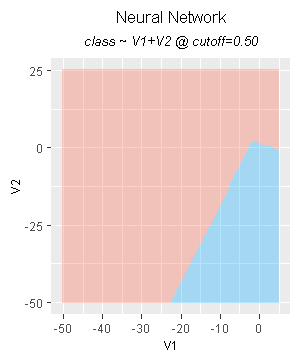

In [20]:
set.seed(0)
model = neuralnet(class.bin ~ V1+V2, data.train, hidden=2, act.fct="logistic", rep=1, linear.output=FALSE)
cutoff = 0.5

grid = data.frame(expand.grid(seq(-50,5,0.5), seq(-50,25,0.5))); names(grid) = c("V1","V2")
output = compute(model, grid, rep=1)$net.result
class.predicted = as.class(data.frame(fraud=output, legit=1-output), class="fraud", cutoff)

output_size(2.5,3)
ggplot(grid) + ggtitle("Neural Network", sprintf("class ~ V1+V2 @ cutoff=%0.2f", cutoff)) +
geom_tile(aes(x=V1, y=V2, fill=class.predicted), alpha=0.3) +
scale_fill_manual(values=PALETTE[c(2,1)]) + theme.no_legend
output_size(restore)

In [21]:
output = compute(model, data.test, rep=1)$net.result
prob = data.frame(fraud=output, legit=1-output)
class.predicted = as.class(prob, class="fraud", cutoff)
CM = confusionMatrix(class.predicted, data.test$class)$table
cm = CM/sum(CM)
accuracy.nn = cm[1,1]+cm[2,2]
fpr.nn = cm[1,2]/sum(cm[,2]) # predicted fraud, but actually legit
fnr.nn = cm[2,1]/sum(cm[,1]) # predicted legit, but actually fraud

layout(fmt.cm(cm), fmt(data.frame(accuracy=accuracy.nn, fpr=fpr.nn, fnr=fnr.nn), title=""))

,fraud,legit
fraud,0.0013623,0.0970626
legit,0.0003652,0.9012099
accuracy,fpr,fnr
0.9025723,0.0972305,0.2113821


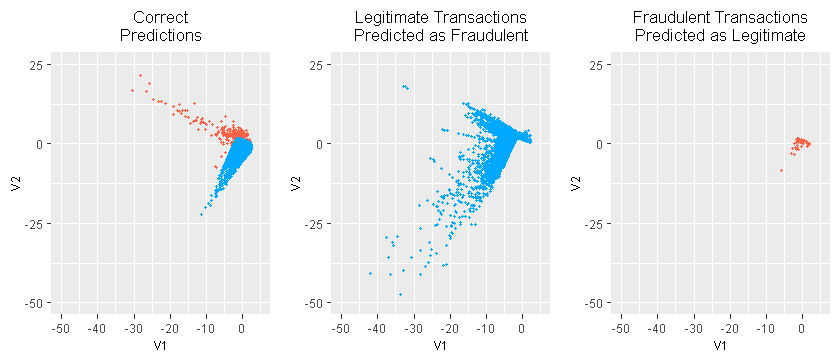

In [22]:
p1 = ggplot(data.test[data.test$class==class.predicted,]) +
     ggtitle("Correct\nPredictions") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[c(2,1)]) + theme.no_legend

p2 = ggplot(data.test[data.test$class=="legit" & class.predicted=="fraud",]) +
     ggtitle("Legitimate Transactions\nPredicted as Fraudulent") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[1]) + theme.no_legend

p3 = ggplot(data.test[data.test$class=="fraud" & class.predicted=="legit",]) +
     ggtitle("Fraudulent Transactions\nPredicted as Legitimate") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[2]) + theme.no_legend

grid.arrange(p1, p2, p3, nrow=1)

In [23]:
cost.legit_fraud = cm[2,1]/sum(cm[,1]) * length(which(data$class=="fraud")) * charge
cost.fraud_legit = cm[1,2]/sum(cm[,2]) * length(which(data$class=="legit")) * (dissatisfaction_penalty + intervention)
cost.fraud_fraud = cm[1,1]/sum(cm[,1]) * length(which(data$class=="fraud")) * intervention
cost.legit_legit = 0
cost.nn = cost.legit_fraud + cost.fraud_legit + cost.fraud_fraud + cost.legit_legit

data.frame(cost.legit_fraud, cost.fraud_legit, cost.fraud_fraud, cost.legit_legit, cost=cost.nn)

cost.legit_fraud,cost.fraud_legit,cost.fraud_fraud,cost.legit_legit,cost
12709.98,27920538,3880,0,27937128


## Predict Fraud by Logistic Regression

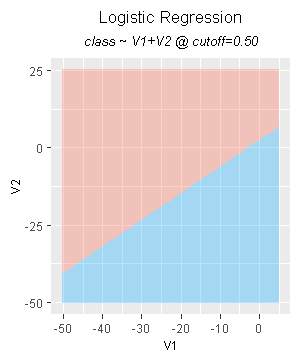

In [24]:
model = glm(class.bin ~ V1+V2, binomial(link="logit"), data.train)
cutoff = 0.5

grid = data.frame(expand.grid(seq(-50,5,0.5), seq(-50,25,0.5))); names(grid) = c("V1","V2")
output = predict(model, grid, type="response")
class.predicted = as.class(data.frame(fraud=output, legit=1-output), class="fraud", cutoff)

output_size(2.5,3)
ggplot(grid) + ggtitle("Logistic Regression", sprintf("class ~ V1+V2 @ cutoff=%0.2f", cutoff)) +
geom_tile(aes(x=V1, y=V2, fill=class.predicted), alpha=0.3) +
scale_fill_manual(values=PALETTE[c(2,1)]) + theme.no_legend
output_size(restore)

In [25]:
output = predict(model, data.test, type="response")
prob = data.frame("fraud"=output, "legit"=1-output)
class.predicted = as.class(prob, class="fraud", cutoff)
CM = confusionMatrix(class.predicted, data.test$class)$table
cm = CM/sum(CM)
accuracy.lr = cm[1,1]+cm[2,2]
fpr.lr = cm[1,2]/sum(cm[,2]) # predicted fraud, but actually legit
fnr.lr = cm[2,1]/sum(cm[,1]) # predicted legit, but actually fraud

layout(fmt.cm(cm), fmt(data.frame(accuracy=accuracy.lr, fpr=fpr.lr, fnr=fnr.lr), title=""))

,fraud,legit
fraud,0.0011446,0.0967044
legit,0.0005829,0.9015681
accuracy,fpr,fnr
0.9027127,0.0968718,0.3373984


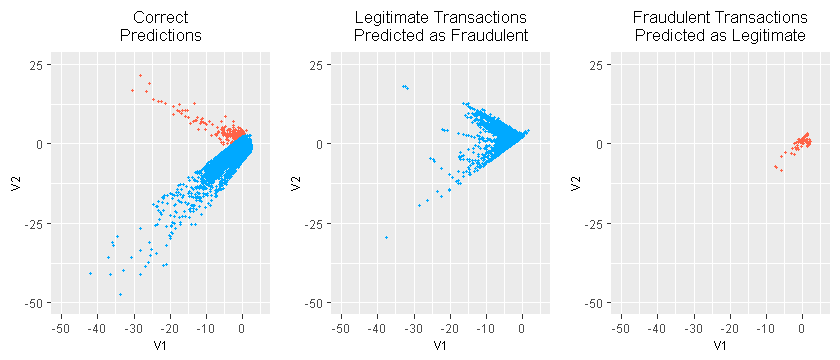

In [26]:
p1 = ggplot(data.test[data.test$class==class.predicted,]) +
     ggtitle("Correct\nPredictions") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[c(2,1)]) + theme.no_legend

p2 = ggplot(data.test[data.test$class=="legit" & class.predicted=="fraud",]) +
     ggtitle("Legitimate Transactions\nPredicted as Fraudulent") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[1]) + theme.no_legend

p3 = ggplot(data.test[data.test$class=="fraud" & class.predicted=="legit",]) +
     ggtitle("Fraudulent Transactions\nPredicted as Legitimate") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[2]) + theme.no_legend

grid.arrange(p1, p2, p3, nrow=1)

In [27]:
cost.legit_fraud = cm[2,1]/sum(cm[,1]) * length(which(data$class=="fraud")) * charge
cost.fraud_legit = cm[1,2]/sum(cm[,2]) * length(which(data$class=="legit")) * (dissatisfaction_penalty + intervention)
cost.fraud_fraud = cm[1,1]/sum(cm[,1]) * length(which(data$class=="fraud")) * intervention
cost.legit_legit = 0
cost.lr = cost.legit_fraud + cost.fraud_legit + cost.fraud_fraud + cost.legit_legit

data.frame(cost.legit_fraud, cost.fraud_legit, cost.fraud_fraud, cost.legit_legit, cost=cost.lr)

cost.legit_fraud,cost.fraud_legit,cost.fraud_fraud,cost.legit_legit,cost
20287.08,27817518,3260,0,27841065


## Predict Fraud by Decision Tree

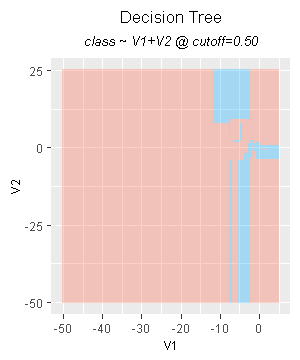

In [28]:
model = rpart(class ~ V1+V2, data.train, method="class", control=list(cp=0.001, minsplit=1, minbucket=1))
cutoff = 0.5

grid = data.frame(expand.grid(seq(-50,5,0.5), seq(-50,25,0.5))); names(grid) = c("V1","V2")
class.predicted = as.class(predict(model, grid, type="prob"), class="fraud", cutoff)

output_size(2.5,3)
ggplot(grid) + ggtitle("Decision Tree", sprintf("class ~ V1+V2 @ cutoff=%0.2f", cutoff)) +
geom_tile(aes(x=V1, y=V2, fill=class.predicted), alpha=0.3) +
scale_fill_manual(values=PALETTE[c(2,1)]) + theme.no_legend
output_size(restore)

In [29]:
prob = predict(model, data.test, type="prob")
class.predicted = as.class(prob, class="fraud", cutoff)
CM = confusionMatrix(class.predicted, data.test$class)$table
cm = CM/sum(CM)
accuracy.dt = cm[1,1]+cm[2,2]
fpr.dt = cm[1,2]/sum(cm[,2]) # predicted fraud, but actually legit
fnr.dt = cm[2,1]/sum(cm[,1]) # predicted legit, but actually fraud

layout(fmt.cm(cm), fmt(data.frame(accuracy=accuracy.dt, fpr=fpr.dt, fnr=fnr.dt), title=""))

,fraud,legit
fraud,0.0013764,0.1795959
legit,0.0003511,0.8186766
accuracy,fpr,fnr
0.8200529,0.1799067,0.203252


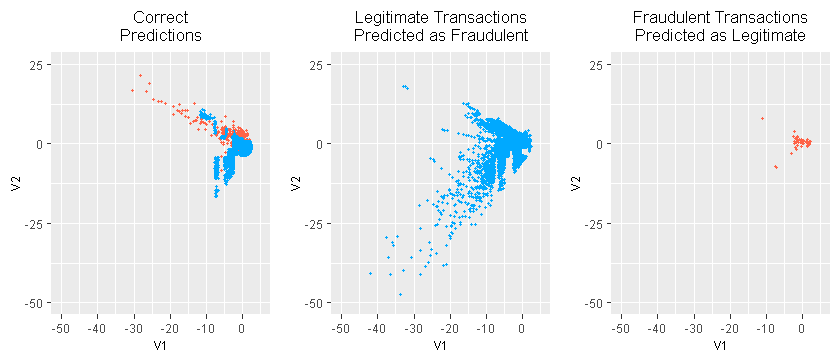

In [30]:
p1 = ggplot(data.test[data.test$class==class.predicted,]) +
     ggtitle("Correct\nPredictions") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[c(2,1)]) + theme.no_legend

p2 = ggplot(data.test[data.test$class=="legit" & class.predicted=="fraud",]) +
     ggtitle("Legitimate Transactions\nPredicted as Fraudulent") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[1]) + theme.no_legend

p3 = ggplot(data.test[data.test$class=="fraud" & class.predicted=="legit",]) +
     ggtitle("Fraudulent Transactions\nPredicted as Legitimate") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[2]) + theme.no_legend

grid.arrange(p1, p2, p3, nrow=1)

In [31]:
cost.legit_fraud = cm[2,1]/sum(cm[,1]) * length(which(data$class=="fraud")) * charge
cost.fraud_legit = cm[1,2]/sum(cm[,2]) * length(which(data$class=="legit")) * (dissatisfaction_penalty + intervention)
cost.fraud_fraud = cm[1,1]/sum(cm[,1]) * length(which(data$class=="fraud")) * intervention
cost.legit_legit = 0
cost.dt = cost.legit_fraud + cost.fraud_legit + cost.fraud_fraud + cost.legit_legit

data.frame(cost.legit_fraud, cost.fraud_legit, cost.fraud_fraud, cost.legit_legit, cost=cost.dt)

cost.legit_fraud,cost.fraud_legit,cost.fraud_fraud,cost.legit_legit,cost
12221.13,51661682,3920,0,51677823


## Predict Fraud by k-Nearest Neighbors

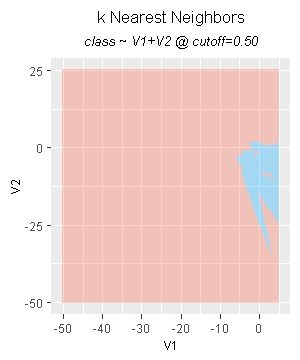

In [32]:
cutoff = 0.5

grid = data.frame(expand.grid(seq(-50,5,0.5), seq(-50,25,0.5))); names(grid) = c("V1","V2")
class.predicted = as.class(kknn(class ~ V1+V2, data.train, grid, k=7, scale=TRUE, kernel="rectangular")$prob, class="fraud", cutoff)

output_size(2.5,3)
ggplot(grid) + ggtitle("k Nearest Neighbors", sprintf("class ~ V1+V2 @ cutoff=%0.2f", cutoff)) +
geom_tile(aes(x=V1, y=V2, fill=class.predicted), alpha=0.3) +
scale_fill_manual(values=PALETTE[c(2,1)]) + theme.no_legend
output_size(restore)

In [33]:
prob = kknn(class ~ V1+V2, data.train, data.test, k=7, scale=TRUE, kernel="rectangular")$prob
class.predicted = as.class(prob, class="fraud", cutoff)
CM = confusionMatrix(class.predicted, data.test$class)$table
cm = CM/sum(CM)
accuracy.knn = cm[1,1]+cm[2,2]
fpr.knn = cm[1,2]/sum(cm[,2]) # predicted fraud, but actually legit
fnr.knn = cm[2,1]/sum(cm[,1]) # predicted legit, but actually fraud

layout(fmt.cm(cm), fmt(data.frame(accuracy=accuracy.dt, fpr=fpr.knn, fnr=fnr.knn), title=""))

,fraud,legit
fraud,0.0013694,0.1006861
legit,0.0003581,0.8975864
accuracy,fpr,fnr
0.8200529,0.1008603,0.2073171


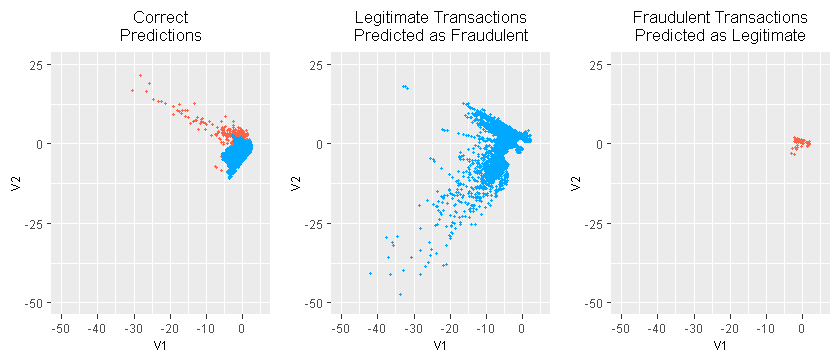

In [34]:
p1 = ggplot(data.test[data.test$class==class.predicted,]) +
     ggtitle("Correct\nPredictions") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[c(2,1)]) + theme.no_legend

p2 = ggplot(data.test[data.test$class=="legit" & class.predicted=="fraud",]) +
     ggtitle("Legitimate Transactions\nPredicted as Fraudulent") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[1]) + theme.no_legend

p3 = ggplot(data.test[data.test$class=="fraud" & class.predicted=="legit",]) +
     ggtitle("Fraudulent Transactions\nPredicted as Legitimate") + xlim(-50,5) + ylim(-50,25) +
     geom_point(aes(x=V1, y=V2, color=class), na.rm=TRUE) +
     scale_color_manual(values=PALETTE[2]) + theme.no_legend

grid.arrange(p1, p2, p3, nrow=1)

In [35]:
cost.legit_fraud = cm[2,1]/sum(cm[,1]) * length(which(data$class=="fraud")) * charge
cost.fraud_legit = cm[1,2]/sum(cm[,2]) * length(which(data$class=="legit")) * (dissatisfaction_penalty + intervention)
cost.fraud_fraud = cm[1,1]/sum(cm[,1]) * length(which(data$class=="fraud")) * intervention
cost.legit_legit = 0
cost.knn = cost.legit_fraud + cost.fraud_legit + cost.fraud_fraud + cost.legit_legit

data.frame(cost.legit_fraud, cost.fraud_legit, cost.fraud_fraud, cost.legit_legit, cost=cost.knn)

cost.legit_fraud,cost.fraud_legit,cost.fraud_fraud,cost.legit_legit,cost
12465.55,28962862,3900,0,28979227


## Comparison of Methods

Some metrics on which to base a comparison of methods:
* accuracy: correct predictions / total
* true positive rate (aka sensitivity): correct positive predictions / positive actuals
* true negative rate (aka specificity): correct negative predictions / negative actuals
* false positive rate: incorrect positive predictions / negative actuals
* false negative rate: incorrect negative predictions / positive actuals
* positive predictive value (aka precision): correct positive predictions / positive predictions
* negative predictive value: correct negative predictions / negative predictions

For our case, positive means fraudulent, negative means legitimate.

In [36]:
methods = c("baseline", "naive bayes", "svm", "neural network", "logistic regression", "decision tree", "knn")

results = data.frame(method=factor(methods, levels=methods),
                     cost=c(cost.base, cost.nb, cost.svm, cost.nn, cost.lr, cost.dt, cost.knn),
                     accuracy=c(accuracy.base, accuracy.nb, accuracy.svm, accuracy.nn, accuracy.lr, accuracy.dt, accuracy.knn),
                     false_positive_rate=c(fpr.base, fpr.nb, fpr.svm, fpr.nn, fpr.lr, fpr.dt, fpr.knn),
                     false_negative_rate=c(fnr.base, fnr.nb, fnr.svm, fnr.nn, fnr.lr, fnr.dt, fnr.knn))
results

method,cost,accuracy,false_positive_rate,false_negative_rate
baseline,60127.97,0.9982725,0.00000000,1.0000000
naive bayes,9977467.40,0.9644390,0.03461666,0.5813008
svm,4030789.69,0.9847686,0.01386495,0.8048780
neural network,27937128.18,0.9025723,0.09723053,0.2113821
logistic regression,27841064.92,0.9027127,0.09687177,0.3373984
decision tree,51677822.84,0.8200529,0.17990672,0.2032520
knn,28979227.42,0.8989558,0.10086032,0.2073171


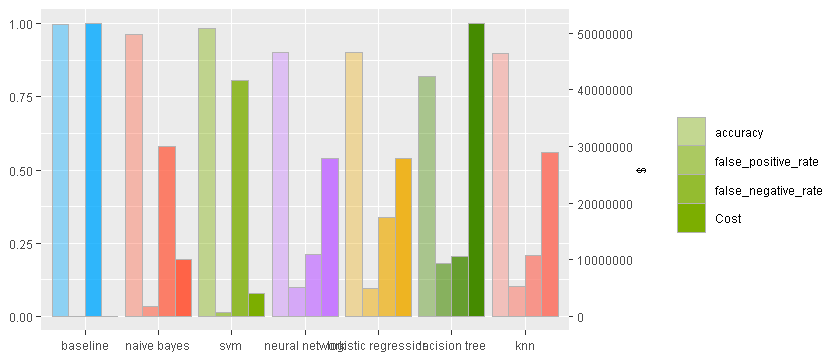

In [37]:
results$Cost = results$cost/max(results$cost)

ggplot(melt(results[,-2], id.vars="method")) + xlab(NULL) + ylab(NULL) +
geom_col(aes(x=method, y=value, group=variable, fill=method, alpha=variable), lwd=0.01, color="grey70", position="dodge") + 
scale_alpha_manual(values=c(0.4,0.6,0.8,1.0)) +
scale_y_continuous(sec.axis = sec_axis(~.*max(results$cost), name="$")) +
guides(fill=FALSE)

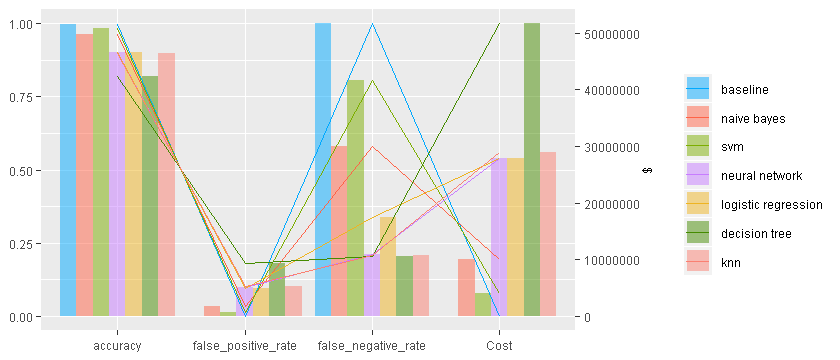

In [38]:
results$Cost = results$cost/max(results$cost)

ggplot(melt(results[,-2], id.vars="method")) + xlab(NULL) + ylab(NULL) +
geom_col(aes(x=variable, y=value, group=method, fill=method), position="dodge", alpha=0.5) + 
geom_line(aes(x=variable, y=value, group=method, color=method)) + 
scale_y_continuous(sec.axis = sec_axis(~.*max(results$cost), name="$"))

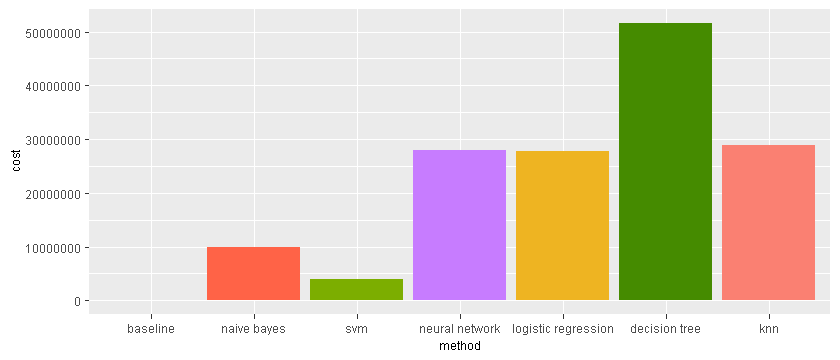

In [39]:
ggplot(results) + geom_col(aes(x=method, y=cost, fill=method)) + theme.no_legend

## Discussion

* How do the patterns of incorrect predictions vary across methods?
* How could you improve the decision model?
* How sensitive are the results to the business parameters (assumptions)?
* How sensitive are the results to the choice of training data?
* How sensitive are the results to the choice of hyper-parameters?
* How sensitive are the results to the choice of evaluation method?
* How sensitive are the results to the class prior probabilities (i.e., the rate of fraudulent transactions)?

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised March 27, 2020
</span>
</p>
</font>